In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [ ]:
df = pd.read_csv('titanic.csv')  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


performing preprocessing steps

In [ ]:
df["Age"].fillna(29,inplace = True)
x = df.iloc[:, [5, 7]].values 
x

array([[22.,  0.],
       [38.,  0.],
       [26.,  0.],
       ...,
       [29.,  2.],
       [26.,  0.],
       [32.,  0.]])

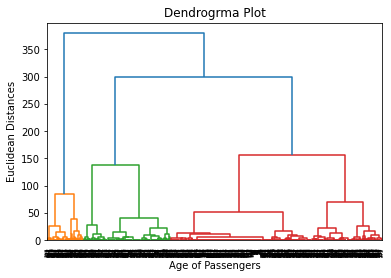

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Age of Passengers")  
mtp.show()  

The Dendogram allows us to detect atleast 3 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  
y_pred

array([0, 2, 3, 2, 2, 3, 1, 0, 3, 0, 0, 1, 0, 2, 0, 1, 0, 3, 3, 3, 2, 2,
       0, 3, 0, 2, 3, 0, 3, 3, 2, 3, 3, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 1, 3, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 3, 3,
       3, 0, 0, 3, 2, 0, 0, 3, 2, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 0, 3,
       3, 3, 3, 0, 2, 3, 1, 3, 1, 3, 2, 2, 3, 3, 0, 2, 2, 3, 0, 3, 2, 3,
       1, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 3, 2, 2, 1, 0, 3, 3, 3, 2, 2, 0,
       1, 3, 3, 3, 0, 2, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 2, 2, 1, 0, 1, 2,
       3, 1, 0, 3, 3, 3, 2, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 0, 0, 0, 1, 0,
       3, 1, 3, 2, 3, 3, 0, 0, 0, 3, 3, 2, 2, 2, 2, 0, 0, 0, 2, 1, 3, 2,
       3, 3, 3, 3, 2, 2, 0, 0, 2, 3, 0, 2, 3, 2, 0, 3, 3, 3, 3, 2, 2, 3,
       0, 3, 1, 3, 2, 0, 0, 0, 0, 3, 2, 3, 1, 0, 3, 3, 2, 0, 0, 2, 3, 3,
       3, 0, 3, 2, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 3, 3, 2, 1, 3, 0, 1, 2,
       3, 2, 0, 3, 1, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 1, 3, 0, 0, 3, 2,
       3, 0, 2, 0, 3, 0, 2, 3, 3, 3, 3, 0, 3, 1, 3,

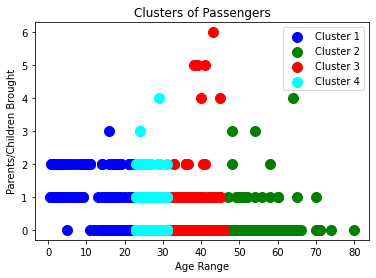

In [ ]:
#visulaizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.title('Clusters of Passengers')  
mtp.xlabel('Age Range')  
mtp.ylabel('Parents/Children Brought')  
mtp.legend()  
mtp.show()  

The visualization allows us to infer familial relations along with age - Between Ages 30 - 50 - it can be said that the most amount of Parents/Children were brought aboard.

In [ ]:
x1 = df.iloc[:, [5, 2]].values 
x1

array([[22.,  3.],
       [38.,  1.],
       [26.,  3.],
       ...,
       [29.,  3.],
       [26.,  1.],
       [32.,  3.]])

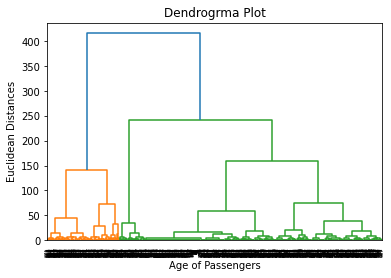

In [ ]:
dendro1 = shc.dendrogram(shc.linkage(x1, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Age of Passengers")  
mtp.show()  

This dendogram allows us to understand that Atleast 2 clusters are present.

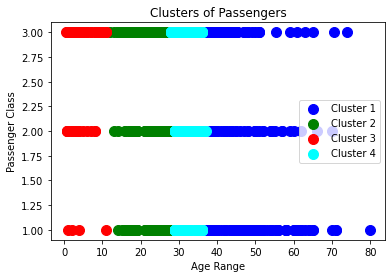

In [ ]:
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x1)  
mtp.scatter(x1[y_pred == 0, 0], x1[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x1[y_pred == 1, 0], x1[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x1[y_pred== 2, 0], x1[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x1[y_pred == 3, 0], x1[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.title('Clusters of Passengers')  
mtp.xlabel('Age Range')  
mtp.ylabel('Passenger Class')  
mtp.legend()  
mtp.show()  

The above cluster plot allows us to understand that most of the customers in all 3 classes had an age range of extreme late 30s to the maximum age being 80.

# Heirarchical Clustering
Advantages of Hierarchical Clustering:

We can obtain the optimal number of clusters from the model itself, human intervention not required.
Dendrograms help us in clear visualization, which is practical and easy to understand.
Disadvantages of Hierarchical Clustering:

Not suitable for large datasets due to high time and space complexity.
There is no mathematical objective for Hierarchical clustering.
All the approaches to calculate the similarity between clusters has their own disadvantages.

#Kmeans Vs Heirarchical
k-means, using a pre-specified  number of clusters, the method  assigns records to each cluster to  find the mutually exclusive cluster  of spherical shape based on distance.	Hierarchical methods can be either divisive or agglomerative.

K Means clustering needed advance knowledge of K i.e. no. of clusters one want to divide your data.	In hierarchical clustering one can stop at any number of clusters, one find appropriate by interpreting the dendrogram.

One can use median or mean as a cluster centre to represent each cluster.	Agglomerative methods  begin with ‘n’ clusters and sequentially combine similar clusters until only one cluster is obtained.

KMEANS Methods used are normally less computationally intensive and are suited with very large datasets.	Divisive methods work in the opposite direction, beginning with one cluster that includes all the records and Hierarchical methods are especially useful when the target is to arrange the clusters into a natural hierarchy.

In K Means clustering, since one start with random choice of clusters, the results produced by running the algorithm many times may differ.	In Hierarchical Clustering, results are reproducible in Hierarchical clustering

K- means clustering a simply a division of the set of data objects into non-overlapping subsets (clusters) such that each  data object is in exactly one subset).	A hierarchical clustering is a set of nested clusters that are arranged as a tree.

K Means clustering is found to work well when the structure of the clusters is hyper spherical (like circle in 2D,  sphere in 3D).	Hierarchical clustering don’t work  as well as, k means when the  shape of the clusters is hyper  spherical.

KMEANSAdvantages: 1. Convergence is guaranteed. 2. Specialized to clusters of different sizes and shapes.	
HEIRARAdvantages:  1 .Ease of handling of any forms of similarity or distance. 2. Consequently, applicability to any attributes types.

KMEANSDisadvantages: 1. K-Value is difficult to predict 2. Didn’t work well with global cluster.	
HEIRARDisadvantage: 1. Hierarchical clustering requires the computation and storage of an n×n  distance matrix. For very large datasets, this can be expensive and slow